In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNetCV, Lasso
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.kernel_ridge import KernelRidge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from tqdm.notebook import tqdm
import os


import warnings
from datetime import datetime
    

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


/kaggle/input/willow-real-estate/sample_submission.csv
/kaggle/input/willow-real-estate/train.csv
/kaggle/input/willow-real-estate/test.csv


In [452]:
# Import train & test data 
df_train = pd.read_csv('/kaggle/input/willow-real-estate/train.csv')
df_test = pd.read_csv('/kaggle/input/willow-real-estate/test.csv')
sample_submission = pd.read_csv('/kaggle/input/willow-real-estate/sample_submission.csv')

df_train['df_train_test'] = 1
df_test['df_train_test'] = 0
all_data = pd.concat([df_train,df_test])


In [349]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9760 non-null   int64  
 1   city                    9760 non-null   object 
 2   postalcode              9760 non-null   int64  
 3   coord_X                 9332 non-null   float64
 4   coord_Y                 8784 non-null   float64
 5   dist                    9760 non-null   float64
 6   bearing                 9760 non-null   float64
 7   house_quality_index     9760 non-null   int64  
 8   house_state_index       9760 non-null   object 
 9   age_since_construction  9760 non-null   int64  
 10  age_since_renovation    9760 non-null   int64  
 11  floors                  9760 non-null   int64  
 12  basement                9760 non-null   object 
 13  bedrooms                9760 non-null   int64  
 14  baths                   9760 non-null   

In [350]:
df_train = df_train[df_train['price'] > 0]

In [351]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9760 entries, 0 to 9759
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9760 non-null   int64  
 1   city                    9760 non-null   object 
 2   postalcode              9760 non-null   int64  
 3   coord_X                 9332 non-null   float64
 4   coord_Y                 8784 non-null   float64
 5   dist                    9760 non-null   float64
 6   bearing                 9760 non-null   float64
 7   house_quality_index     9760 non-null   int64  
 8   house_state_index       9760 non-null   object 
 9   age_since_construction  9760 non-null   int64  
 10  age_since_renovation    9760 non-null   int64  
 11  floors                  9760 non-null   int64  
 12  basement                9760 non-null   object 
 13  bedrooms                9760 non-null   int64  
 14  baths                   9760 non-null   

In [149]:
df_train.month.value_counts()

7     1092
4     1072
6     1064
8      954
10     918
3      905
9      867
12     757
11     692
2      644
1      474
5      321
Name: month, dtype: int64

In [147]:
df_train.baths.value_counts()

2.50    2453
1.00    1751
1.75    1378
2.25     929
2.00     872
1.50     666
2.75     520
3.50     329
3.00     319
3.25     266
3.75      66
4.00      58
4.50      45
4.25      38
0.75      27
4.75      11
5.00      10
1.25       6
0.00       4
5.25       4
0.50       3
6.00       2
5.50       2
5.75       1
Name: baths, dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9760 non-null   int64  
 1   city                    9760 non-null   object 
 2   postalcode              9760 non-null   int64  
 3   coord_X                 9332 non-null   float64
 4   coord_Y                 8784 non-null   float64
 5   dist                    9760 non-null   float64
 6   bearing                 9760 non-null   float64
 7   house_quality_index     9760 non-null   int64  
 8   house_state_index       9760 non-null   object 
 9   age_since_construction  9760 non-null   int64  
 10  age_since_renovation    9760 non-null   int64  
 11  floors                  9760 non-null   int64  
 12  basement                9760 non-null   object 
 13  bedrooms                9760 non-null   int64  
 14  baths                   9760 non-null   

In [453]:
rows, cols = df_train.shape
print(f'Training Dataset\n-------\ncolumns: {cols}\nrows: {rows}')
cat_cols = df_train.loc[:, df_train.columns != 'price'].select_dtypes(include=['object']).columns
num_cols = df_train.loc[:, df_train.columns != 'price'].select_dtypes(exclude=['object']).columns
print(f'categorical columns: {len(cat_cols)}\nnumeric columns: {len(num_cols)}\n\n=================\n')

rows, cols = df_test.shape
print(f'Test Dataset\n-------\ncolumns: {cols}\nrows: {rows}')
cat_cols = df_test.loc[:, df_test.columns != 'price'].select_dtypes(include=['object']).columns
num_cols = df_test.loc[:, df_test.columns != 'price'].select_dtypes(exclude=['object']).columns
print(f'categorical columns: {len(cat_cols)}\nnumeric columns: {len(num_cols)}')

Training Dataset
-------
columns: 25
rows: 9760
categorical columns: 6
numeric columns: 18


Test Dataset
-------
columns: 24
rows: 6502
categorical columns: 6
numeric columns: 18


In [15]:
df_train.columns

Index(['id', 'city', 'postalcode', 'coord_X', 'coord_Y', 'dist', 'bearing',
       'house_quality_index', 'house_state_index', 'age_since_construction',
       'age_since_renovation', 'floors', 'basement', 'bedrooms', 'baths',
       'living_m2', 'lot_m2', 'living_vs_neighbors', 'lot_vs_neighbors',
       'viewsToPOI', 'view_quality', 'dow', 'month', 'price'],
      dtype='object')

In [16]:
df_train.shape

(9760, 24)

In [ ]:
####################  NULLS AND DROPPING COLUMNS ############################

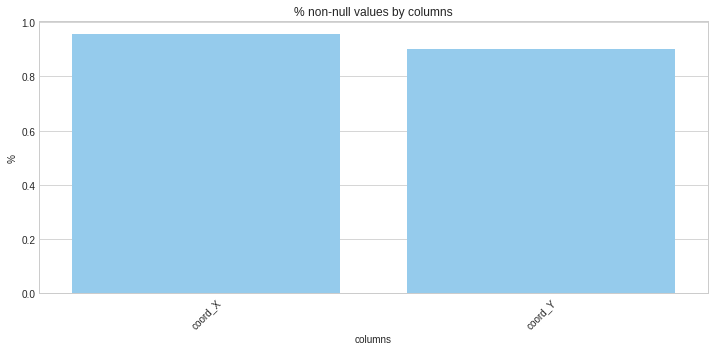

In [454]:
nulls = {}

for col in df_train.columns:
    nulls[col] = (1-(len(df_train[df_train[col].isna()][col]) / df_train.shape[0]))

labels = []
vals = []

for k, v in nulls.items():
    if v < 1.0:
        labels.append(k)
        vals.append(v)

_, ax = plt.subplots(figsize=(12,5))

sns.barplot(y=vals, x=labels, color='lightskyblue')
ax.set_xticklabels(labels=labels, rotation=45)
plt.title('% non-null values by columns')
ax.set_xlabel('columns')
ax.set_ylabel('%')
plt.show()

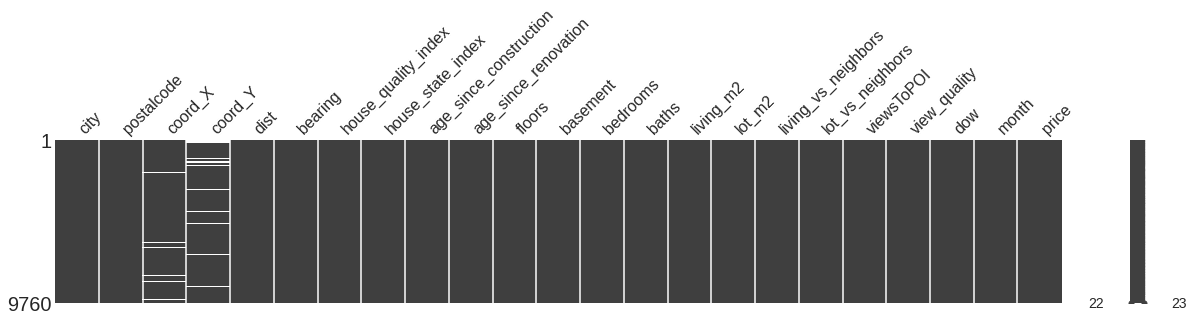

In [274]:
# should I remove variables without coordinates?
# Plot graphic of missing values
x = list(range(1,24))
missingno.matrix(df_train.iloc[:,x], figsize = (20,3))

In [427]:
# find which columns are missing values, and how many
def find_missing_values(df,columns):
    missing_vals = {}
    df_length = len(df)
    for i in df.columns:
        total_columns_values = df[i].value_counts().sum()
        missing_vals[i] = df_length - total_columns_values
    return missing_vals     

missing_values = find_missing_values(df_train,columns = df_train.columns)
missing_values

{'id': 0,
 'city': 0,
 'postalcode': 0,
 'coord_X': 428,
 'coord_Y': 976,
 'dist': 0,
 'bearing': 0,
 'house_quality_index': 0,
 'house_state_index': 0,
 'age_since_construction': 0,
 'age_since_renovation': 0,
 'floors': 0,
 'basement': 0,
 'bedrooms': 0,
 'baths': 0,
 'living_m2': 0,
 'lot_m2': 0,
 'living_vs_neighbors': 0,
 'lot_vs_neighbors': 0,
 'viewsToPOI': 0,
 'view_quality': 0,
 'dow': 0,
 'month': 0,
 'price': 0,
 'df_train_test': 0}

In [455]:
to_drop = []

for k, v in nulls.items():
    if v < 0.6:
        to_drop.append(k)
        
#make a copy
df_train_c = df_train.drop(to_drop, axis=1)

rows, cols = df_train_c.shape
print(f'columns: {cols}\nrows: {rows}')
cat_cols = df_train_c.loc[:, df_train_c.columns != 'price'].select_dtypes(include=['object']).columns
num_cols = df_train_c.loc[:, df_train_c.columns != 'price'].select_dtypes(exclude=['object']).columns
print(f'categorical columns: {len(cat_cols)}\nnumeric columns: {len(num_cols)}')

columns: 25
rows: 9760
categorical columns: 6
numeric columns: 18


In [429]:
# replace df_train_c! missing values with most frequent
si = SimpleImputer(strategy='most_frequent')

for k,v in nulls.items():
    if (v < 1) and (k not in to_drop):
        df_train_c[k] = si.fit_transform(df_train_c[k].values.reshape(-1,1))

In [430]:
# split between numeric and 
df_train_num = df_train_c.select_dtypes(include=[np.number])
df_train_cat = df_train_c.select_dtypes(exclude=[np.number])

In [124]:
df_train_cat.columns

Index(['city', 'house_state_index', 'basement', 'viewsToPOI', 'view_quality',
       'dow'],
      dtype='object')

In [117]:
# NO nulls now
df_train_num.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9760 non-null   int64  
 1   postalcode              9760 non-null   int64  
 2   coord_X                 9760 non-null   float64
 3   coord_Y                 9760 non-null   float64
 4   dist                    9760 non-null   float64
 5   bearing                 9760 non-null   float64
 6   house_quality_index     9760 non-null   int64  
 7   age_since_construction  9760 non-null   int64  
 8   age_since_renovation    9760 non-null   int64  
 9   floors                  9760 non-null   int64  
 10  bedrooms                9760 non-null   int64  
 11  baths                   9760 non-null   float64
 12  living_m2               9760 non-null   int64  
 13  lot_m2                  9760 non-null   int64  
 14  living_vs_neighbors     9760 non-null   

In [32]:
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               9760 non-null   object
 1   house_state_index  9760 non-null   object
 2   basement           9760 non-null   object
 3   viewsToPOI         9760 non-null   object
 4   view_quality       9760 non-null   object
 5   dow                9760 non-null   object
dtypes: object(6)
memory usage: 457.6+ KB


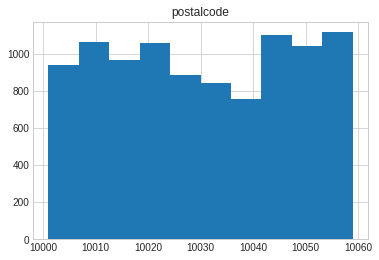

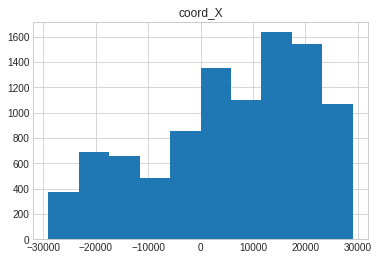

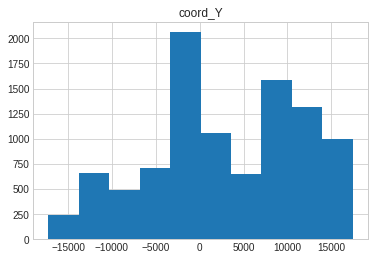

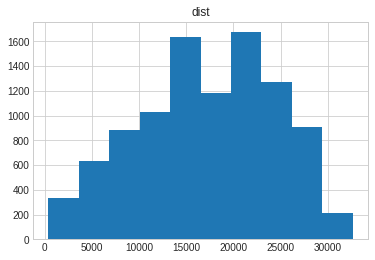

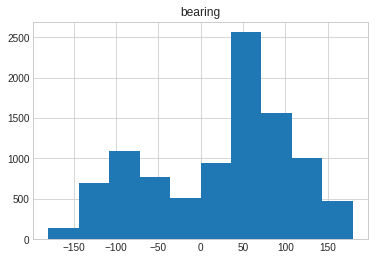

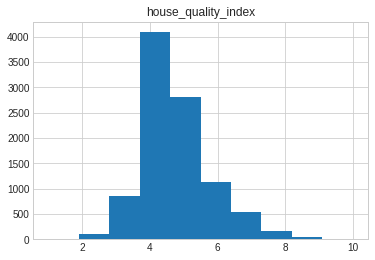

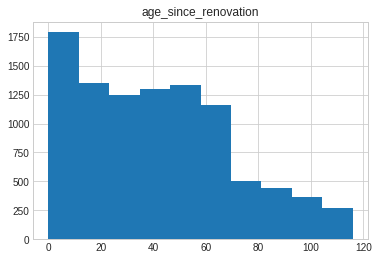

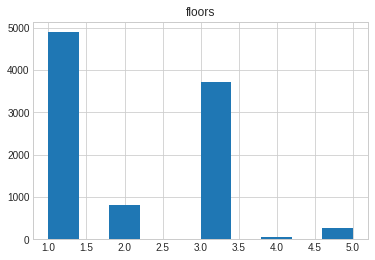

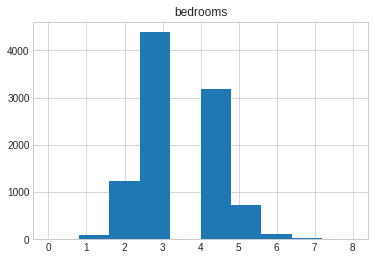

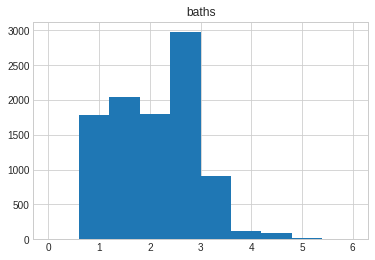

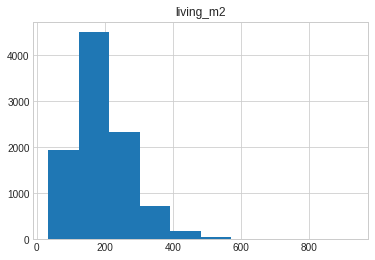

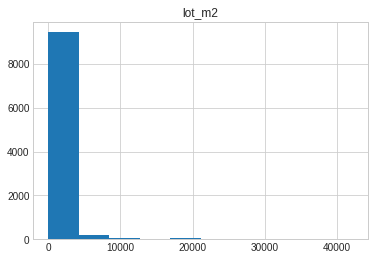

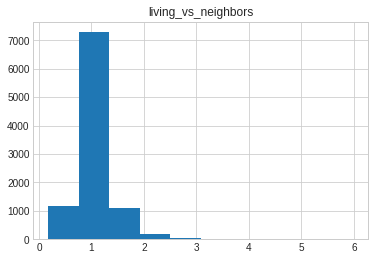

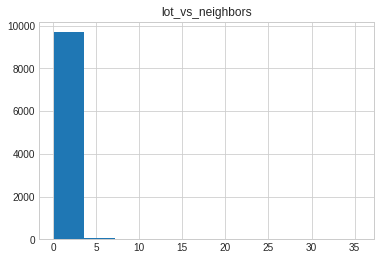

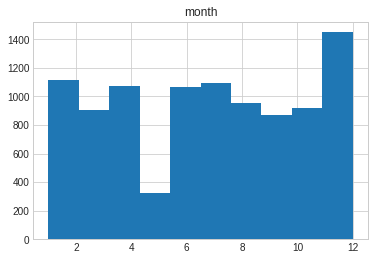

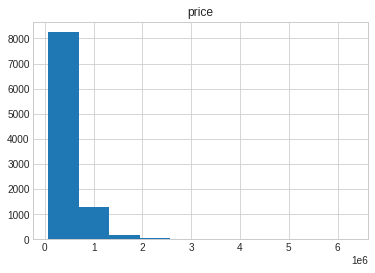

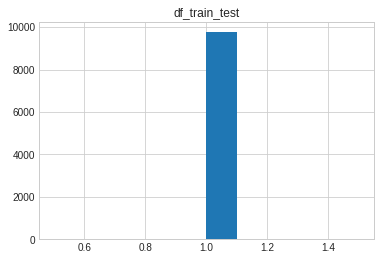

In [103]:
# distributions for all numeric variables 
for i in df_train_num.columns:
    plt.hist(df_train_num[i])
    plt.title(i)
    plt.show()
    
    # remove id

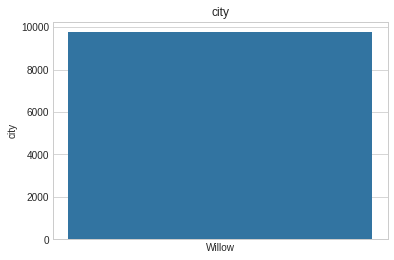

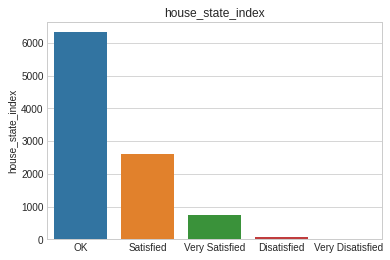

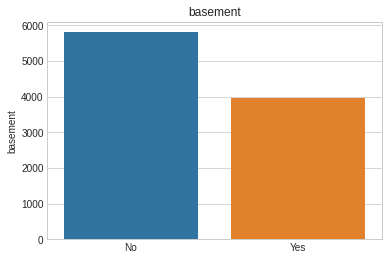

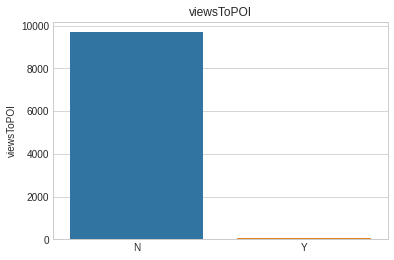

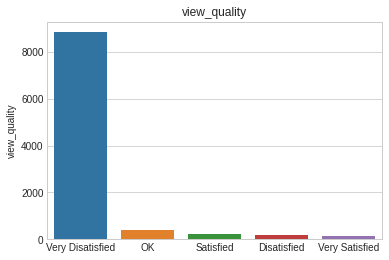

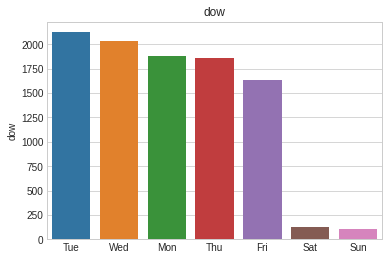

In [35]:
# charts for categorical variables
for i in df_train_cat.columns:
    sns.barplot(df_train_cat[i].value_counts().index,df_train_cat[i].value_counts()).set_title(i)
    plt.show()
    
    # remove city

In [38]:
pd.set_option('display.max_columns', None)

In [ ]:
#################### CORRELATION ############################  NOT USED

                      postalcode   coord_X   coord_Y      dist   bearing  \
postalcode              1.000000  0.089585 -0.009160  0.204548  0.038190   
coord_X                 0.089585  1.000000  0.088016  0.258987  0.745330   
coord_Y                -0.009160  0.088016  1.000000  0.185111 -0.097649   
dist                    0.204548  0.258987  0.185111  1.000000  0.124135   
bearing                 0.038190  0.745330 -0.097649  0.124135  1.000000   
house_quality_index    -0.017431  0.104034 -0.256451 -0.045664  0.254828   
age_since_renovation    0.001716  0.137815  0.386029 -0.014933  0.032169   
floors                 -0.035750  0.025586 -0.139429  0.018350  0.077178   
bedrooms               -0.008276 -0.027007 -0.168351 -0.080605  0.039095   
baths                  -0.032995  0.005906 -0.258549 -0.050767  0.119613   
living_m2              -0.031916  0.040708 -0.263920 -0.084756  0.164462   
lot_m2                  0.019483 -0.055597 -0.238623  0.048762 -0.058261   
living_vs_ne

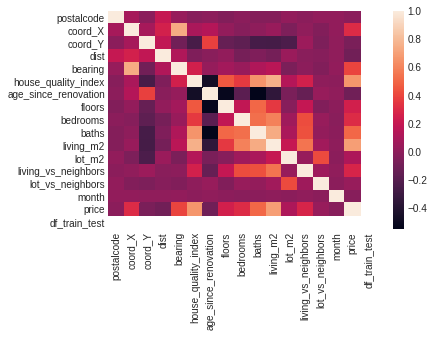

In [104]:
#test for correlation
print(df_train_num.corr())
sns.heatmap(df_train_num.corr())

In [105]:
df_train_corr_test = df_train_num.copy()

In [106]:
df_train_corr_test.drop(['price','df_train_test'], axis = 1, inplace = True)

In [107]:
cor_matrix = df_train_corr_test.corr().abs()
print(cor_matrix)

                      postalcode   coord_X   coord_Y      dist   bearing  \
postalcode              1.000000  0.089585  0.009160  0.204548  0.038190   
coord_X                 0.089585  1.000000  0.088016  0.258987  0.745330   
coord_Y                 0.009160  0.088016  1.000000  0.185111  0.097649   
dist                    0.204548  0.258987  0.185111  1.000000  0.124135   
bearing                 0.038190  0.745330  0.097649  0.124135  1.000000   
house_quality_index     0.017431  0.104034  0.256451  0.045664  0.254828   
age_since_renovation    0.001716  0.137815  0.386029  0.014933  0.032169   
floors                  0.035750  0.025586  0.139429  0.018350  0.077178   
bedrooms                0.008276  0.027007  0.168351  0.080605  0.039095   
baths                   0.032995  0.005906  0.258549  0.050767  0.119613   
living_m2               0.031916  0.040708  0.263920  0.084756  0.164462   
lot_m2                  0.019483  0.055597  0.238623  0.048762  0.058261   
living_vs_ne

In [108]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                      postalcode   coord_X   coord_Y      dist   bearing  \
postalcode                   NaN  0.089585  0.009160  0.204548  0.038190   
coord_X                      NaN       NaN  0.088016  0.258987  0.745330   
coord_Y                      NaN       NaN       NaN  0.185111  0.097649   
dist                         NaN       NaN       NaN       NaN  0.124135   
bearing                      NaN       NaN       NaN       NaN       NaN   
house_quality_index          NaN       NaN       NaN       NaN       NaN   
age_since_renovation         NaN       NaN       NaN       NaN       NaN   
floors                       NaN       NaN       NaN       NaN       NaN   
bedrooms                     NaN       NaN       NaN       NaN       NaN   
baths                        NaN       NaN       NaN       NaN       NaN   
living_m2                    NaN       NaN       NaN       NaN       NaN   
lot_m2                       NaN       NaN       NaN       NaN       NaN   
living_vs_ne

In [109]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)
# remove age since renovation OR constructions, and maybe 'bearing' and 'living_m2'?


['living_m2']


In [134]:
df_train_c.drop(['coord_X'], axis = 1, inplace = True)

In [135]:
df_train_c

,id,city,postalcode,coord_Y,dist,bearing,house_quality_index,house_state_index,age_since_construction,age_since_renovation,floors,basement,bedrooms,baths,living_m2,lot_m2,living_vs_neighbors,lot_vs_neighbors,viewsToPOI,view_quality,dow,month,price,df_train_test
0,1,Willow,10023,-717.194382,13582.830407,-93.026713,4,Very Satisfied,41,41,1,No,3,2.00,123,671,0.86,1.00,N,Very Disatisfied,Tue,6,226487,1
1,2,Willow,10036,14160.976735,20745.247980,46.951826,6,OK,10,9,3,Yes,3,3.50,256,417,1.41,0.75,N,Very Disatisfied,Thu,12,852083,1
2,3,Willow,10005,-3198.092746,6337.162858,120.308577,4,Satisfied,61,61,1,Yes,3,1.50,142,736,1.01,0.81,N,Very Disatisfied,Wed,7,405006,1
3,4,Willow,10011,-15910.380353,17488.331686,155.473751,7,OK,10,10,3,No,4,3.75,309,746,0.89,1.00,N,Very Disatisfied,Mon,7,720376,1
4,5,Willow,10031,-2816.796816,13704.477529,83.229725,4,OK,63,63,1,No,3,1.00,108,999,0.49,0.79,N,Very Disatisfied,Wed,12,786720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,9756,Willow,10015,-8286.976149,26506.480257,108.218379,4,Satisfied,48,48,1,No,3,1.00,108,888,1.00,0.90,N,Very Disatisfied,Tue,11,292574,1
9756,9757,Willow,10057,-8121.070993,19297.193317,-114.887763,4,Satisfied,27,27,1,No,3,1.75,117,892,0.77,0.97,N,Very Disatisfied,Tue,4,261727,1
9757,9758,Willow,10013,8086.859215,10849.187156,41.807522,4,Satisfied,103,103,1,Yes,5,2.50,265,466,1.30,1.00,N,Very Disatisfied,Sat,8,665147,1
9758,9759,Willow,10054,13024.983243,23232.561542,55.900288,4,OK,88,87,2,No,3,1.00,118,355,1.00,0.91,N,Very Disatisfied,Fri,3,482569,1


In [ ]:
########################################

In [431]:
X = df_train_c.loc[:, df_train_c.columns != 'price']
y = df_train_c.loc[:, df_train_c.columns == 'price']

df_train_ID = df_train.id
df_test_ID = df_test.id

X = X.loc[:, X.columns != 'id']

In [ ]:
#####################   Data Skewness #############

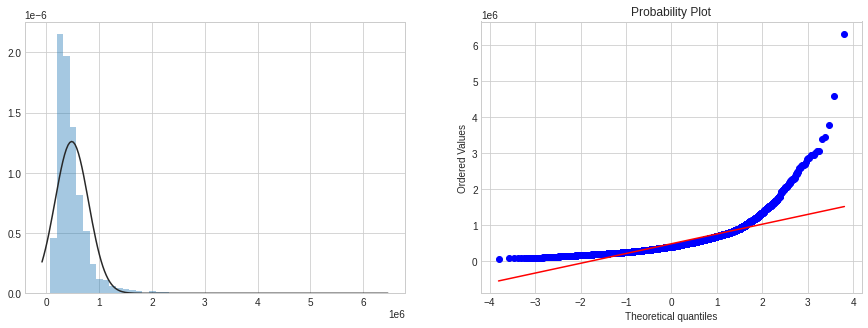

Fisher-Pearson coeficient of skewness: 3.60


In [432]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(y.price,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.price.values):.2f}')

In [433]:
numerical_columns = X.loc[:, ~X.columns.isin(['city', 'house_state_index', 'basement', 'viewsToPOI','view_quality','dow','house_quality_index', 'floors', 'bedrooms', 'baths', 'id'])].select_dtypes(include=['int', 'float']).columns
sk = X[numerical_columns].apply(lambda x: stats.skew(x.dropna())).to_frame('Fisher-Pearson Coef')
skw_cols = list(sk[abs(sk['Fisher-Pearson Coef']) > 0.527].index)
sk[abs(sk['Fisher-Pearson Coef']) > 0.527]

,Fisher-Pearson Coef
age_since_renovation,0.527018
living_m2,1.262644
lot_m2,8.496313
living_vs_neighbors,2.241428
lot_vs_neighbors,19.817987


In [434]:
lmbda = 0.0
X[skw_cols] = X[numerical_columns].loc[:, X[numerical_columns].columns.isin(skw_cols)].apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [435]:
y = y.apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [436]:
sk['Fisher-Pearson Coef (After)'] = X[numerical_columns].apply(lambda x: stats.skew(x))
sk[sk.index.isin(skw_cols)]

,Fisher-Pearson Coef,Fisher-Pearson Coef (After)
age_since_renovation,0.527018,-1.216960
living_m2,1.262644,-0.061049
lot_m2,8.496313,0.683150
living_vs_neighbors,2.241428,0.885233
lot_vs_neighbors,19.817987,4.022098


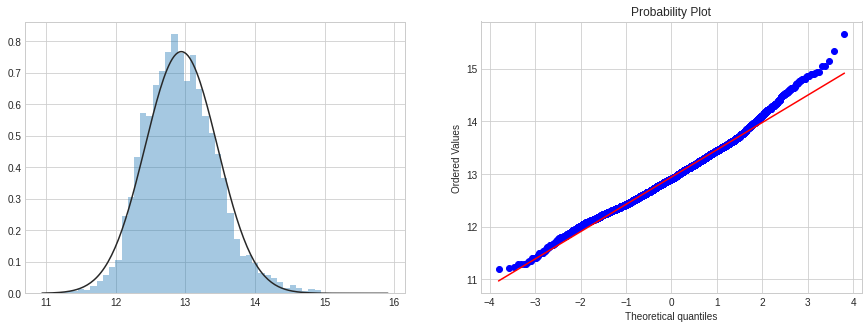

Fisher-Pearson coeficient of skewness: 0.40


In [151]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(y.price,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.price.values):,.2f}')

In [ ]:
# we filtered the num variables that were skewed  (> 0.5) and transformed them

In [ ]:
# ########## CONTINUOUS VARIABLES ##########

In [145]:
df_train_num

,id,postalcode,coord_X,coord_Y,dist,bearing,house_quality_index,age_since_construction,age_since_renovation,floors,bedrooms,baths,living_m2,lot_m2,living_vs_neighbors,lot_vs_neighbors,month,price,df_train_test
0,1,10023,-13563.882707,-717.194382,13582.830407,-93.026713,4,41,41,1,3,2.00,123,671,0.86,1.00,6,226487,1
1,2,10036,15160.212784,14160.976735,20745.247980,46.951826,6,10,9,3,3,3.50,256,417,1.41,0.75,12,852083,1
2,3,10005,5470.999532,-3198.092746,6337.162858,120.308577,4,61,61,1,3,1.50,142,736,1.01,0.81,7,405006,1
3,4,10011,7259.582783,-15910.380353,17488.331686,155.473751,7,10,10,3,4,3.75,309,746,0.89,1.00,7,720376,1
4,5,10031,13608.913498,-2816.796816,13704.477529,83.229725,4,63,63,1,3,1.00,108,999,0.49,0.79,12,786720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,9756,10015,25177.758477,-8286.976149,26506.480257,108.218379,4,48,48,1,3,1.00,108,888,1.00,0.90,11,292574,1
9756,9757,10057,-17505.138555,-8121.070993,19297.193317,-114.887763,4,27,27,1,3,1.75,117,892,0.77,0.97,4,261727,1
9757,9758,10013,7232.397250,8086.859215,10849.187156,41.807522,4,103,103,1,5,2.50,265,466,1.30,1.00,8,665147,1
9758,9759,10054,19238.028156,13024.983243,23232.561542,55.900288,4,88,87,2,3,1.00,118,355,1.00,0.91,3,482569,1


In [299]:
X_disc.columns

Index(['postalcode', 'coord_Y', 'dist', 'bearing', 'age_since_construction',
       'age_since_renovation', 'living_m2', 'lot_m2', 'living_vs_neighbors',
       'lot_vs_neighbors', 'month', 'df_train_test', 'y'],
      dtype='object')

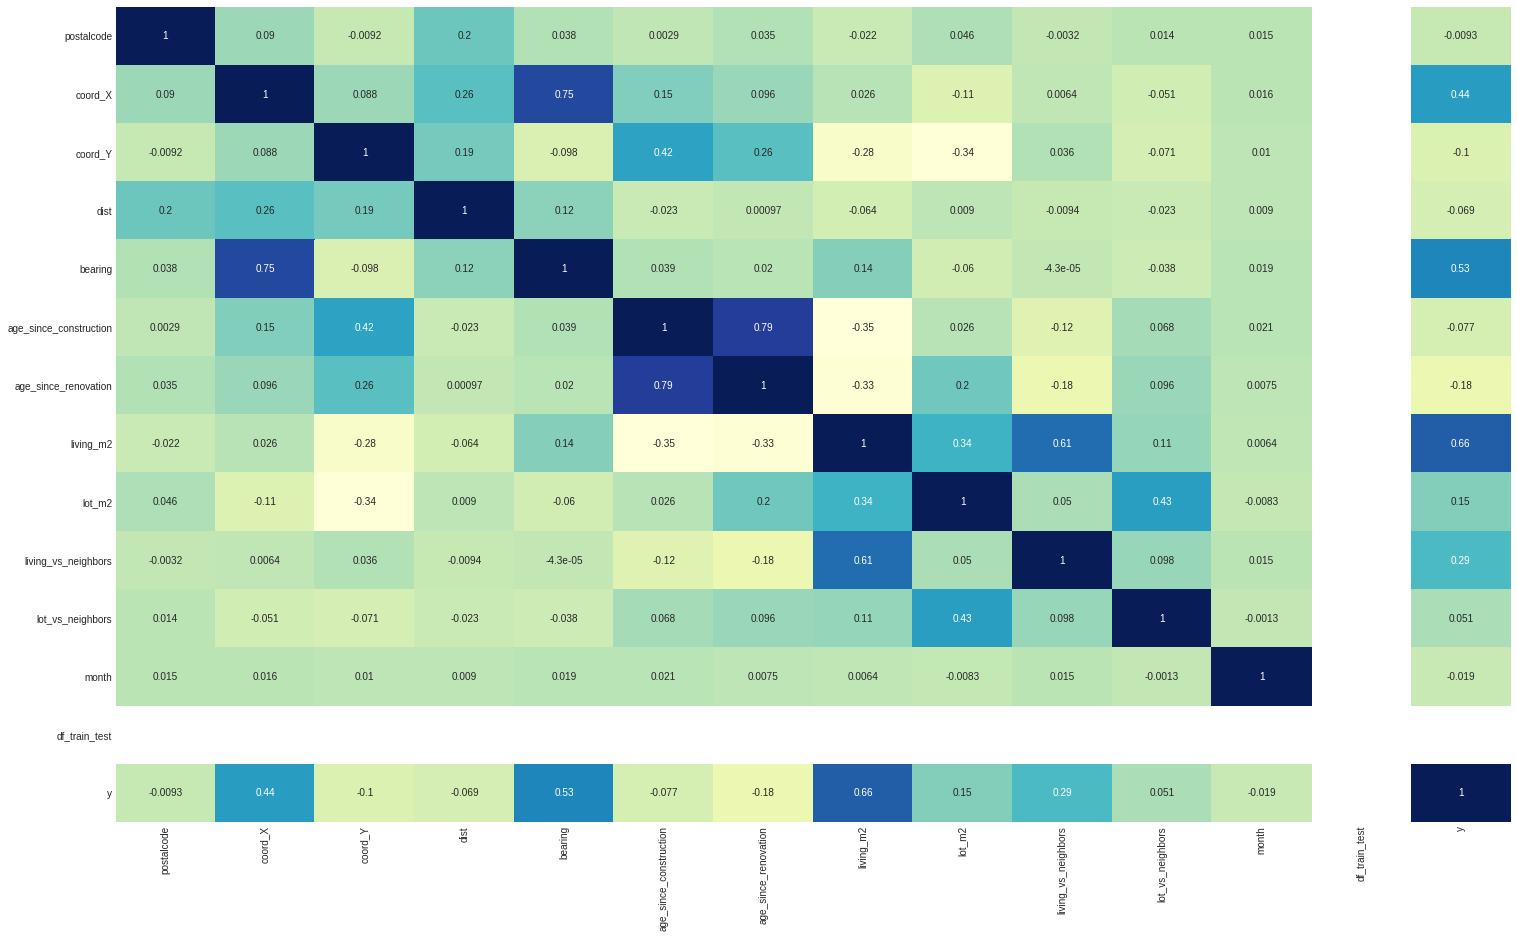

In [437]:
X_disc = X.loc[:,~(X.columns.isin(['house_quality_index', 'floors', 'bedrooms', 'baths', 'id'])) &
                  (X.columns.isin(numerical_columns))]

X_disc['y'] = y

_, ax = plt.subplots(figsize=(25,15))

sns.heatmap(X_disc.corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

In [438]:
mask = (abs(X_disc.corr()['y'] >= 0.05))
corr_variables = X_disc.corr()['y'][mask]
corr_variables = list(corr_variables[corr_variables.index != 'y'].index)

corr_variables

['coord_X',
 'bearing',
 'living_m2',
 'lot_m2',
 'living_vs_neighbors',
 'lot_vs_neighbors']

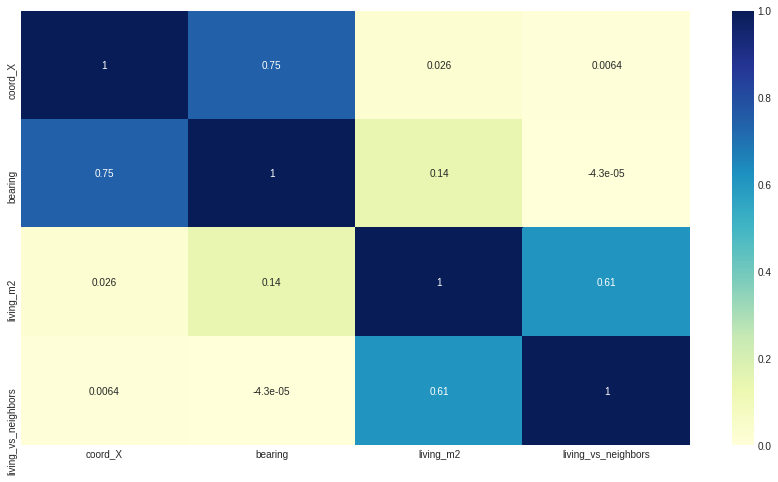

In [303]:
_, ax = plt.subplots(figsize=(15,8))

sns.heatmap(X_disc.loc[:, corr_variables].corr(), annot=True, cbar=True, cmap='YlGnBu')
plt.show()

In [304]:
mask = ((abs(X_disc.loc[:, corr_variables].corr()) > 0.8) & 
        (X_disc.loc[:, corr_variables].corr() != 1.0))
cols = list(X_disc.loc[:, corr_variables].corr()[mask].dropna(how='all', axis=1).columns)

to_remove = []

for i in range(0,len(cols),2):
    to_remove.append(cols[i])
    
continous_features = list(set(corr_variables) - set(to_remove))
continous_features

['coord_X', 'living_vs_neighbors', 'bearing', 'living_m2']

In [ ]:
####### DISCRETE ###############

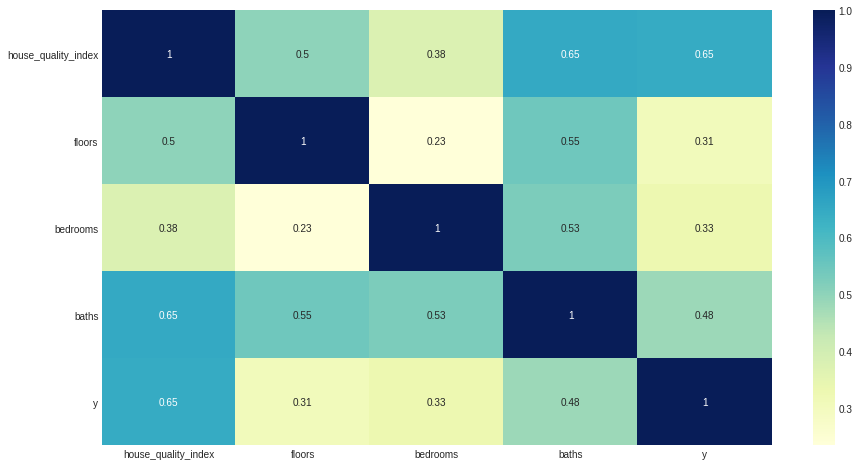

In [439]:
X_discrete = X.loc[:, X.columns.isin(['house_quality_index', 'floors', 'bedrooms', 'baths'])]
X_discrete['y'] = y

_, ax = plt.subplots(figsize=(15,8))

sns.heatmap(X_discrete.corr('spearman'), annot=True, cmap='YlGnBu')
plt.show()

In [316]:
df_train

,id,city,postalcode,coord_X,coord_Y,dist,bearing,house_quality_index,house_state_index,age_since_construction,age_since_renovation,floors,basement,bedrooms,baths,living_m2,lot_m2,living_vs_neighbors,lot_vs_neighbors,viewsToPOI,view_quality,dow,month,price,df_train_test
0,1,Willow,10023,-13563.882707,-717.194382,13582.830407,-93.026713,4,Very Satisfied,41,41,1,No,3,2.00,123,671,0.86,1.00,N,Very Disatisfied,Tue,6,226487,1
1,2,Willow,10036,15160.212784,14160.976735,20745.247980,46.951826,6,OK,10,9,3,Yes,3,3.50,256,417,1.41,0.75,N,Very Disatisfied,Thu,12,852083,1
2,3,Willow,10005,5470.999532,-3198.092746,6337.162858,120.308577,4,Satisfied,61,61,1,Yes,3,1.50,142,736,1.01,0.81,N,Very Disatisfied,Wed,7,405006,1
3,4,Willow,10011,7259.582783,-15910.380353,17488.331686,155.473751,7,OK,10,10,3,No,4,3.75,309,746,0.89,1.00,N,Very Disatisfied,Mon,7,720376,1
4,5,Willow,10031,13608.913498,NaN,13704.477529,83.229725,4,OK,63,63,1,No,3,1.00,108,999,0.49,0.79,N,Very Disatisfied,Wed,12,786720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,9756,Willow,10015,25177.758477,-8286.976149,26506.480257,108.218379,4,Satisfied,48,48,1,No,3,1.00,108,888,1.00,0.90,N,Very Disatisfied,Tue,11,292574,1
9756,9757,Willow,10057,-17505.138555,-8121.070993,19297.193317,-114.887763,4,Satisfied,27,27,1,No,3,1.75,117,892,0.77,0.97,N,Very Disatisfied,Tue,4,261727,1
9757,9758,Willow,10013,7232.397250,8086.859215,10849.187156,41.807522,4,Satisfied,103,103,1,Yes,5,2.50,265,466,1.30,1.00,N,Very Disatisfied,Sat,8,665147,1
9758,9759,Willow,10054,19238.028156,13024.983243,23232.561542,55.900288,4,OK,88,87,2,No,3,1.00,118,355,1.00,0.91,N,Very Disatisfied,Fri,3,482569,1


In [308]:
discrete_features

['baths', 'floors', 'bedrooms', 'house_quality_index']

In [440]:
X_num = X.loc[:, X.columns.isin(continous_features + discrete_features)]
X_num['y'] = y

In [310]:
X_num

,coord_X,bearing,house_quality_index,floors,bedrooms,baths,living_m2,living_vs_neighbors,y
0,-13563.882707,-93.026713,4,1,3,2.00,4.820282,0.620576,12.330447
1,15160.212784,46.951826,6,3,3,3.50,5.549076,0.879627,13.655440
2,5470.999532,120.308577,4,1,3,1.50,4.962845,0.698135,12.911660
3,7259.582783,155.473751,7,3,4,3.75,5.736572,0.636577,13.487530
4,13608.913498,83.229725,4,1,3,1.00,4.691348,0.398776,13.575629
...,...,...,...,...,...,...,...,...,...
9755,25177.758477,108.218379,4,1,3,1.00,4.691348,0.693147,12.586476
9756,-17505.138555,-114.887763,4,1,3,1.75,4.770685,0.570980,12.475061
9757,7232.397250,41.807522,4,1,5,2.50,5.583496,0.832909,13.407765
9758,19238.028156,55.900288,4,2,3,1.00,4.779123,0.693147,13.086881


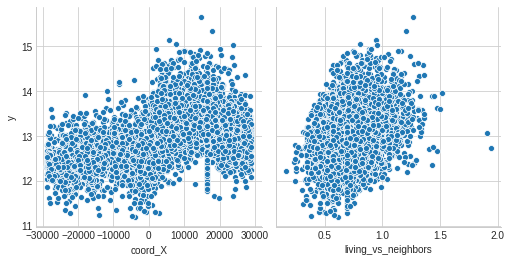

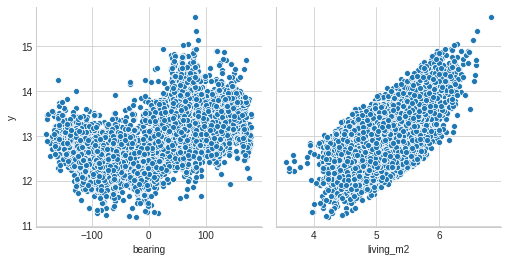

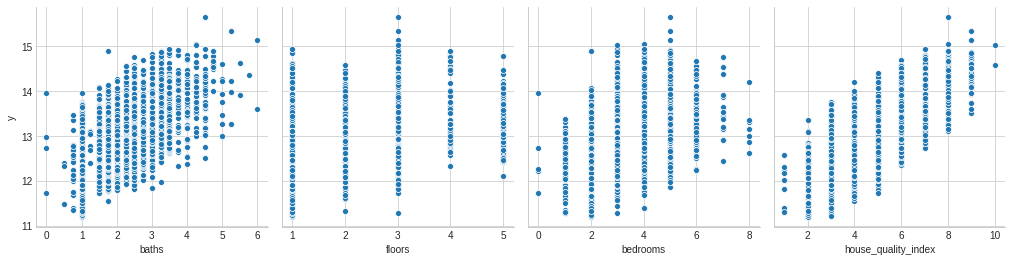

In [441]:

sns.pairplot(x_vars=continous_features[:int(len(continous_features)/2)],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=continous_features[int(len(continous_features)/2):],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=discrete_features,
             y_vars=['y'],
            data=X_num,
            height=3.5)

plt.show()

In [401]:
df_train.viewsToPOI.value_counts()

N    9691
Y      69
Name: viewsToPOI, dtype: int64

In [442]:
le = LabelEncoder()

X['viewsToPOI_enc']  = X[['viewsToPOI']].apply(lambda x: le.fit_transform(x.values))

In [443]:
r, p = stats.pointbiserialr(X.viewsToPOI_enc.values, y.values.ravel())
print(f'viewsToPOI_enc - r: {r} | p: {p}')

viewsToPOI_enc - r: 0.19809094360251955 | p: 6.129367631180069e-87


In [444]:
dico = ['viewsToPOI_enc']

In [ ]:
## Categorical

In [445]:
categoricals = list(X.loc[:,X.columns != 'viewsToPOI'].select_dtypes(include='object').columns)

In [323]:
categoricals

['city', 'house_state_index', 'basement', 'view_quality', 'dow']

In [406]:
X_categoricals = X[categoricals].apply(lambda x: le.fit_transform(x))
X_categoricals['y']  = y

In [325]:
X_categoricals

,city,house_state_index,basement,view_quality,dow,y
0,0,4,0,3,5,12.330447
1,0,1,1,3,4,13.655440
2,0,2,1,3,6,12.911660
3,0,1,0,3,1,13.487530
4,0,1,0,3,6,13.575629
...,...,...,...,...,...,...
9755,0,2,0,3,5,12.586476
9756,0,2,0,3,5,12.475061
9757,0,2,1,3,2,13.407765
9758,0,1,0,3,0,13.086881


In [446]:
corr = []


for col in tqdm(X_categoricals.columns):
    cat = X_categoricals[col].unique()
   
    y_avg = []
    n_cat = []
    for c in cat:
        y_avg.append(X_categoricals[X_categoricals[col] == c].y.mean())
        n_cat.append(len(X_categoricals[X_categoricals[col] == c]))
    
    y_total_avg = np.sum(np.multiply(y_avg,n_cat) / np.sum(n_cat))

    numerator = np.sum((np.multiply(n_cat,np.power(np.subtract(y_avg, y_total_avg),2))))
    denominator = np.sum(np.power(np.subtract(X_categoricals.y, y_total_avg),2))

    if denominator == 0:
        eta = 0.0
        corr.append((col, eta))
    else:
        eta = np.sqrt(numerator/denominator)
        corr.append((col, eta))
        
print(corr)


[('city', 0.0), ('house_state_index', 0.11639011724486084), ('basement', 0.20362833117562845), ('view_quality', 0.3662338106703507), ('dow', 0.02646905507945477), ('y', 1.0)]


In [407]:
categoricals_columns = []

for el in corr:
    if el[1] >= 0.05:
        categoricals_columns.append(el[0])

categoricals_columns.pop(len(categoricals_columns)-1)
categoricals_columns

['house_state_index', 'basement', 'view_quality']

In [328]:
X_cat = X_categoricals[categoricals_columns]
X_cat['y'] = y

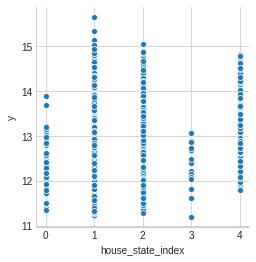

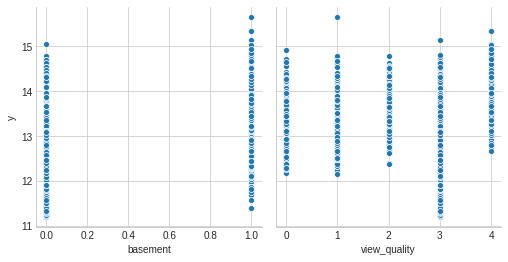

In [329]:
sns.pairplot(x_vars=categoricals_columns[:int(len(categoricals_columns)/2)],
             y_vars=['y'],
            data=X_cat,
            height=3.5)
sns.pairplot(x_vars=categoricals_columns[int(len(categoricals_columns)/2):],
             y_vars=['y'],
            data=X_cat,
            height=3.5)
plt.show()

In [ ]:
# need to remove outliers???????

In [233]:
df_train

,id,city,postalcode,coord_X,coord_Y,dist,bearing,house_quality_index,house_state_index,age_since_construction,age_since_renovation,floors,basement,bedrooms,baths,living_m2,lot_m2,living_vs_neighbors,lot_vs_neighbors,viewsToPOI,view_quality,dow,month,price,df_train_test
0,1,Willow,10023,-13563.882707,-717.194382,13582.830407,-93.026713,4,Very Satisfied,41,41,1,No,3,2.00,123,671,0.86,1.00,N,Very Disatisfied,Tue,6,226487,1
1,2,Willow,10036,15160.212784,14160.976735,20745.247980,46.951826,6,OK,10,9,3,Yes,3,3.50,256,417,1.41,0.75,N,Very Disatisfied,Thu,12,852083,1
2,3,Willow,10005,5470.999532,-3198.092746,6337.162858,120.308577,4,Satisfied,61,61,1,Yes,3,1.50,142,736,1.01,0.81,N,Very Disatisfied,Wed,7,405006,1
3,4,Willow,10011,7259.582783,-15910.380353,17488.331686,155.473751,7,OK,10,10,3,No,4,3.75,309,746,0.89,1.00,N,Very Disatisfied,Mon,7,720376,1
4,5,Willow,10031,13608.913498,NaN,13704.477529,83.229725,4,OK,63,63,1,No,3,1.00,108,999,0.49,0.79,N,Very Disatisfied,Wed,12,786720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,9756,Willow,10015,25177.758477,-8286.976149,26506.480257,108.218379,4,Satisfied,48,48,1,No,3,1.00,108,888,1.00,0.90,N,Very Disatisfied,Tue,11,292574,1
9756,9757,Willow,10057,-17505.138555,-8121.070993,19297.193317,-114.887763,4,Satisfied,27,27,1,No,3,1.75,117,892,0.77,0.97,N,Very Disatisfied,Tue,4,261727,1
9757,9758,Willow,10013,7232.397250,8086.859215,10849.187156,41.807522,4,Satisfied,103,103,1,Yes,5,2.50,265,466,1.30,1.00,N,Very Disatisfied,Sat,8,665147,1
9758,9759,Willow,10054,19238.028156,13024.983243,23232.561542,55.900288,4,OK,88,87,2,No,3,1.00,118,355,1.00,0.91,N,Very Disatisfied,Fri,3,482569,1


In [235]:
X_test

,basement,view_quality,living_vs_neighbors,bearing,living_m2,baths,floors,bedrooms,house_quality_index,viewsToPOI_enc
7716,0,3,0.587787,67.306680,4.852030,1.00,2,4,4,0
8051,1,3,0.737164,53.466318,5.509388,1.50,3,4,6,0
3876,0,3,0.722706,-107.198244,5.631212,2.00,1,4,5,0
3365,0,3,0.576613,117.316354,5.961005,3.75,3,4,8,0
121,1,3,0.712950,85.016864,5.209486,1.75,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...
3272,0,3,0.463734,89.436713,4.488636,1.00,1,3,4,0
6807,0,3,0.688135,107.454388,5.455321,2.50,3,4,5,0
4928,0,3,0.688135,-98.881981,5.278115,2.50,3,3,5,0
1300,1,4,0.693147,123.997201,5.579730,2.50,2,3,7,1


In [252]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   basement             9760 non-null   int64  
 1   view_quality         9760 non-null   int64  
 2   living_vs_neighbors  9760 non-null   float64
 3   bearing              9760 non-null   float64
 4   living_m2            9760 non-null   float64
 5   baths                9760 non-null   float64
 6   floors               9760 non-null   int64  
 7   bedrooms             9760 non-null   int64  
 8   house_quality_index  9760 non-null   int64  
 9   viewsToPOI_enc       9760 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 762.6 KB


In [447]:
features = categoricals_columns + continous_features + discrete_features + dico
X = X[features]
y = y
X[categoricals_columns] = X[categoricals_columns].apply(lambda x: le.fit_transform(x))
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,X.columns != 'y'], y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3)

In [410]:
X_test

,house_state_index,basement,view_quality,coord_X,living_vs_neighbors,bearing,living_m2,baths,floors,bedrooms,house_quality_index,viewsToPOI_enc
5009,2,0,3,10998.647010,0.698135,117.296372,5.393628,2.50,1,3,6,0
3614,1,0,3,-6325.618059,0.779325,-111.767737,5.509388,2.50,3,4,5,0
5167,1,0,3,-6876.558600,0.604316,-40.571946,4.762174,1.00,1,3,4,0
7288,1,0,3,27996.238369,0.737164,93.600324,5.545177,2.75,3,5,5,0
9384,1,0,3,4175.394646,0.559616,163.600962,5.298317,2.50,3,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8198,4,1,3,25371.673215,0.765468,66.159967,5.323010,2.25,1,4,4,0
3838,4,0,3,2301.502523,0.598837,108.957137,4.634729,1.75,1,3,4,0
6960,1,0,3,-20801.602038,0.570980,-90.728649,5.247024,2.50,3,4,5,0
2308,2,0,3,-15355.700479,0.688135,-55.740274,4.912655,1.50,1,2,5,0


In [448]:
n_fold = 5

def rmseModel(m):
    kf = KFold(n_splits=n_fold, random_state=0, shuffle=True).get_n_splits()
    rmse = np.sqrt(-cross_val_score(m, X, y, scoring='neg_mean_squared_error', cv=kf))
    return rmse

,house_state_index,basement,view_quality,coord_X,living_vs_neighbors,bearing,living_m2,baths,floors,bedrooms,house_quality_index,viewsToPOI_enc
6662,1,0,3,25260.894460,0.631272,92.295105,5.442418,2.50,3,3,6,0
3234,1,1,3,3452.352489,0.693147,13.815697,5.429346,3.00,3,3,5,0
66,1,1,3,18829.437811,0.683097,65.650885,5.472271,2.75,1,4,5,0
8732,2,1,3,-10698.110443,0.698135,-46.937178,4.762174,1.00,1,3,3,0
7517,1,0,3,9590.897350,0.657520,46.626867,4.948760,2.00,3,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,1,0,3,22180.236491,0.536493,63.637086,4.882802,1.00,1,3,4,0
2668,1,1,1,3516.236785,0.815365,31.078988,5.480639,2.50,1,4,5,0
7071,1,0,3,23521.316092,0.717840,70.262180,4.795791,3.00,5,3,4,0
1380,1,1,3,18036.004137,0.751416,105.696183,5.313206,2.50,1,4,4,0


In [449]:
XGBBaselie = XGBRegressor(objective='reg:squarederror')
XGBBaselie.fit(X_test, y_test)
pred = XGBBaselie.predict(X_val)

rmseBaseline = np.sqrt(mean_squared_error(pred, y_val.values))
print(f'Baseline RMSE: {rmseBaseline}')

Baseline RMSE: 0.20158988769747743


In [ ]:
######### OLS ##########

In [450]:
ols_reg = LinearRegression()
ols_rge_scores = rmseModel(ols_reg)
print(f'OLS Reg RMSE, mean: {np.mean(ols_rge_scores)}, stdv: {np.std(ols_rge_scores)}')

OLS Reg RMSE, mean: 0.2640764203768616, stdv: 0.005201327378444521


In [ ]:
######### RIDGE ##########

In [219]:
GD = False

In [451]:
if GD:
    print('Running Grid Search for model tunning')
    params = {'alpha': [0.1,0.3,0.5,0.7,0.9],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
    ridge_reg = Ridge()
    gs = GridSearchCV(ridge_reg, params, cv=5)
    gsf = gs.fit(X_train, y_train).best_params_
else:
    gsf = {'alpha': 0.9, 'solver': 'auto'}

ridge_reg = Ridge(**gsf)
ridge_reg_scores = rmseModel(ridge_reg)
print(f'Ridge Reg RMSE, mean: {np.mean(ridge_reg_scores)}, stdv: {np.std(ridge_reg_scores)}')

Ridge Reg RMSE, mean: 0.26407676217281145, stdv: 0.005217310910513138


In [ ]:
######## ELASTIC NET ########

In [338]:
if GD:
    print('Running Grid Search for model tunning')
    params = {'l1_ratio': [.1, .5, .7, .9, .92, .95, .99, 1],
             'n_alphas': [10,15,50, 100],
              'normalize': [True, False],
              'max_iter': [5,10,50,100],
              'tol': [0.001, 0.0001, 0.00001]
                }
    el_reg = ElasticNetCV()
    gs = GridSearchCV(el_reg, params, cv=5, n_jobs=-1, verbose=1)
    gsf = gs.fit(X_train, y_train).best_params_
else:
    gsf = {'l1_ratio': 0.9,
         'max_iter': 50,
         'n_alphas': 50,
         'normalize': True,
         'tol': 0.0001}

    
el_reg = ElasticNetCV(**gsf)
el_reg_scores = rmseModel(el_reg)
print(f'Elastic Net Reg RMSE, mean: {np.mean(el_reg_scores)}, stdv: {np.std(el_reg_scores)}')

Elastic Net Reg RMSE, mean: 0.264087806263562, stdv: 0.005203101693008211


In [ ]:
### GRADIENT BOOST #########

In [339]:
if GD:
    print('Running Grid Search for model tunning')
    params = {'min_samples_split': [80],
             'min_samples_leaf': [25],
             'max_depth':[9],
            'max_features': [4],
             'subsample': [0.8],
             'n_estimators': [2500],
             'learning_rate': [0.005],
             'subsample':[0.87]}
    GB = GradientBoostingRegressor()
    gs = GridSearchCV(GB, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    gsf = gs.fit(X_train, y_train).best_params_
else:
    gsf = {'learning_rate': 0.005,
         'max_depth': 9,
         'max_features': 4,
         'min_samples_leaf': 25,
         'min_samples_split': 80,
         'n_estimators': 2500,
         'subsample': 0.87}

GB_reg = GradientBoostingRegressor(**gsf)
GB_reg_scores = rmseModel(GB_reg)
print(f'GB Reg, mean: {np.mean(GB_reg_scores)}, stdv: {np.std(GB_reg_scores)}')

GB Reg, mean: 0.1780323363559091, stdv: 0.005581930962176905


In [ ]:
#### EXTREME GRAD BOOST REG ######

In [352]:
if GD:
    print('Running Grid Search for model tunning')
    params = {'max_depth ': [1],
              'min_child_weight': [2],
              'gamma ': [0.0],
              'subsample':[0.7],
              'reg_alpha':[1e-5, 1e-4, 1e-6],
              'colsample_bytree': [0.87],
              'scale_pos_weight':[1],
                }

    xgb_reg = XGBRegressor()
    gs = GridSearchCV(xgb_reg, params, cv=5, n_jobs=-1, verbose=1)
    gsf = gs.fit(X_train, y_train).best_params_
else:
    gsf = {'colsample_bytree': 0.87,
         'gamma ': 0.0,
         'max_depth ': 1,
         'min_child_weight': 2,
         'reg_alpha': 1e-06,
         'scale_pos_weight': 1,
         'subsample': 0.7}
    
xgb_reg = XGBRegressor(**gsf, objective='reg:squarederror', nthread=4, learning_rate=0.005, n_estimators=10000)
xgb_reg_scores = rmseModel(xgb_reg)
print(f'XGB Reg, mean: {np.mean(xgb_reg_scores)}, stdv: {np.std(xgb_reg_scores)}')

[18:31:07] WARNING: ../src/learner.cc:516: 
Parameters: { gamma , max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:51] WARNING: ../src/learner.cc:516: 
Parameters: { gamma , max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:34] WARNING: ../src/learner.cc:516: 
Parameters: { gamma , max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find a

In [353]:
olsM = ols_reg.fit(X_train, y_train)
elM = el_reg.fit(X_train, y_train)
RidgeM = ridge_reg.fit(X_train, y_train)
GBregM = GB_reg.fit(X_train, y_train)
XGBoostM = xgb_reg.fit(X_train, y_train)

[18:35:08] WARNING: ../src/learner.cc:516: 
Parameters: { gamma , max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [354]:
ensembleOutput = np.hstack((olsM.predict(X_test), RidgeM.predict(X_test), elM.predict(X_test).reshape(-1,1), GBregM.predict(X_test).reshape(-1,1)))
stackedReg = LinearRegression()
sackedM = stackedReg.fit(ensembleOutput, y_test)

In [355]:
valEnsembleOutput = np.hstack((olsM.predict(X_val), RidgeM.predict(X_val), elM.predict(X_val).reshape(-1,1),GBregM.predict(X_val).reshape(-1,1)))
stackedPred = sackedM.predict(valEnsembleOutput)

In [356]:
pred = (np.expm1(stackedPred).reshape(1,-1)[0]*0.55 +\
np.expm1(XGBoostM.predict(X_val))*0.45)

rmse_test = np.sqrt(mean_squared_error(np.log(pred), y_val.values))
print(f'rmse for test data: {rmse_test}')

rmse for test data: 0.17736670602343438


In [ ]:
######  SUBMITTING

In [357]:
df_test['viewsToPOI_enc']  = df_test[['viewsToPOI']].apply(lambda x: le.fit_transform(x.values))

dfPred = df_test[features]

In [358]:
nulls = {}

for col in dfPred.columns:
    nulls[col] = (1-(len(dfPred[dfPred[col].isna()][col]) / dfPred.shape[0]))
    
for k, v in nulls.items():
    if v < 1.0:
        dfPred[k] = si.fit_transform(dfPred[k].values.reshape(-1,1))
        
dfPred[list(set(skw_cols).intersection(set(dfPred.columns)))] = dfPred[list(set(skw_cols).intersection(set(dfPred.columns)))].\
                                                                                apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

dfPred[categoricals_columns] = dfPred[categoricals_columns].apply(lambda x: le.fit_transform(x))

In [359]:
outputPred = np.hstack((olsM.predict(dfPred), RidgeM.predict(dfPred), elM.predict(dfPred).reshape(-1,1), GBregM.predict(dfPred).reshape(-1,1)))
stackedPred = sackedM.predict(outputPred)
finalPred = (np.expm1(stackedPred).reshape(1,-1)[0]*0.55 +\
np.expm1(XGBoostM.predict(dfPred))*0.45)

In [360]:
dff = pd.DataFrame({
    'id': df_test.id,
    'price':finalPred
})

dff.to_csv(f"submission_{datetime.today().strftime('%Y%m%d')}_v2.csv", index=False)